# Image Stitching to create a Panorama

#### Isn't it interesting how <a href='https://www.movavi.com/learning-portal/best-photo-stitching-software.html'>various apps</a> such as Google photos, Autostitch, Hugin, can stitch and align various shots together to create stunning panoramas? Today let's make our very own panorama stitcher using OpenCV.

<img src='ImageStitching.png'>

Post your doubts and feedback on our FB group <a href='https://www.facebook.com/groups/colearninglounge/learning_content/?filter=600725977000760'>here</a>.

## Table of Contents:
<ul>
    <li>Introduction</li>
    <li>Import the libraries</li>
    <li>Load the images</li>
    <li>Convert the images to grayscale</li>
    <li>Compute SIFT keypoints and descriptors</li>
    <li>Find Top M matches of descriptors of 2 images</li>
    <li>Align the 2 images using homography transformation</li>
    <li>Stitch the images</li>
    <li>Summary</li>
    <li>Credits</li>
</ul>

### Introduction

In this tutorial, you will learn how to stitch two or more images together to make a panorama using OpenCV. We will start by reading the 2 images to be stitched together. Second, we will compute the SIFT-keypoints and descriptors of the two images; and distances between every 2 descriptors of the two images. Third, we will select the top M matches for each descriptor of both images. Next, we estimate the homography matrix and align the 2 pictures for stitching. Finally, we stitch the two images to create a beautiful panorama.

### Import the libraries
Python provides a variety of libraries to ease out the computational challenges of coding and handle relatively complex problems rather easily. Here we import the essential libraries for image stitching task.
<ul>
    <li> <b> Cv2 </b> : It is an open source computer vision (OpenCV) library which provides programming functionality for real-time computer vision. </li>
    <li> <b> Matplotlib </b> : It provides data visualization functionality. </li>
    <li> <b> Numpy </b> : Numerical Python works on an N-dimensional array object and provides basic and complex mathematical functionality for it. </li>  
</ul>

`Note`: SIFT function, that we will be using in this tutorial, is patented. Hence, you need to install 'opencv-contrib-python==3.4.2.16'.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'cv2'

Now that the libraries have been imported successfully, let's move on to loading the images.


### Load the images

You can choose any two images you clicked yourself, or you can download any of the 3 datasets from <a href='https://cs.adelaide.edu.au/~tjchin/apap/'>here</a>. So let's quickly read the images from it. We shall be working on first two images from Case 17 of Dataset 2.

In [2]:
img_1 = cv2.imread('STB_0032.JPG')
plt.imshow(img_1)
plt.show()
img_2 = cv2.imread('STA_0031.JPG')
plt.imshow(img_2)
plt.show()

NameError: name 'cv2' is not defined

### Convert the images to grayscale

After reading the two images, let's convert the RBG image to grayscale.

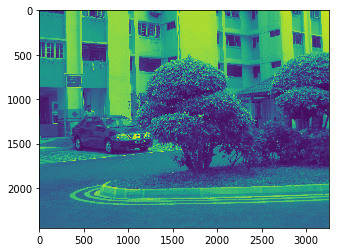

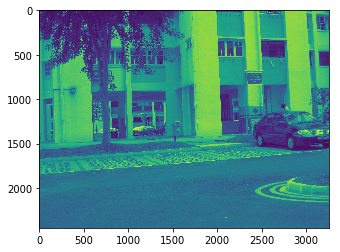

In [3]:
img1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
plt.imshow(img1)
plt.show()
img2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2)
plt.show()

### Compute the SIFT keypoints and descriptors

A Scale Invariant Feature Transform (SIFT) feature or keypoint, is a selected circular region of an image with an orientation. It is described by 4 parameters : 
<ul>
    <li>The keypoint center coordinates x and y </li>
    <li>Its scale : the radius of the region </li>
    <li>Its orientation (an angle expressed in radians) </li>
</ul>
    
A SIFT detector searches for keypoints of different sizes at different positions in the image.

Each SIFT keypoint has a descriptor associated with it. A SIFT descriptor is a 3-D spatial histogram of the image gradients, characterizing the appearance of a keypoint. The gradient at each pixel is regarded as a sample of a 3-D elementary feature vector, formed by the pixel location and the gradient orientation.

You can study the SIFT keypoints and descriptors in further detail <a href='http://www.vlfeat.org/api/sift.html'>here</a>.

Let's calculate the SIFT keypoints and desciptors for the two images.

In [4]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

### Find Top M matches of descriptors of 2 images

Now that we have SIFT keypoints and descriptors, we need to find the distance of each descriptor of image 1 to each descriptor of image 2. 

In [5]:
bf = cv2.BFMatcher()

Next, we select the top M matches of the descriptors. Here, we are taking the value of M to be 2, you can experiment with other values of M as well.

In [6]:
matches = bf.knnMatch(des1,des2, k=2)

Even in the top 2 descriptors, we may have obtained some trivial descriptors. We eliminate those with ratio test.

In [7]:
good = []
for m in matches:
    if (m[0].distance < 0.5*m[1].distance):
        good.append(m)
matches = np.asarray(good)

### Align the 2 images using homography transformation

Two images of a scene are said to be related by a homography under two conditions:
<ul>
    <li>The two images are that of a plane e.g. sheet of paper, credit card etc.</li>
   <li>The two images were acquired by rotating the camera about its optical axis.</li>
</ul>

You can read more about homography matrix <a href='https://www.learnopencv.com/image-alignment-feature-based-using-opencv-c-python/'>here</a>.

We calculate the homography matrix of the 2 images, which require atleast 4 matches, to align the images. It uses a robust technique called Random Sample Consesus (RANSAC), which produces right results even in presence of bad matches.

In [8]:
if (len(matches[:,0]) >= 4):
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertionError('Can’t find enough keypoints.')

### Stitch the images


Once we have the homography for transformation, we can warp the image and stitch the two images.

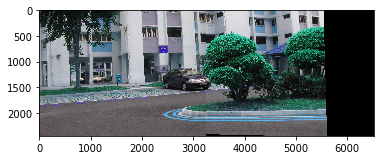

In [9]:
dst = cv2.warpPerspective(img_1,H,((img_1.shape[1] + img_2.shape[1]), img_2.shape[0])) #wraped image
dst[0:img_2.shape[0], 0:img_2.shape[1]] = img_2 #stitched image
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.show()

### Summary
Voila! You just made you own panorama stitcher. It will be a worthwhile effort to extend this work to multiple images, aligned horizontally and/or vertically. You can also try implementing other photo editing tools on your own.

> This tutorial is intended to be a public resource. If you see any glaring inaccuracies or a missing critical topic, please feel free to point it out or submit a pull request to improve the tutorial. 
Also, we are always looking to improve the scope of this article. For any suggestions and feedback, mail us @ colearninglounge@gmail.com
### Credits
> This article is authored by: <li>Naveksha Sood : Follow her on <a href='https://www.linkedin.com/in/naveksha-sood-8b6824160/'>LinkedIn</a>, <a href='https://medium.com/@navekshasood'>Medium</a> and <a href='https://github.com/search?q=naveksha+sood'>GitHub</a>.</li><li>Vagdevi Kommineni : Follow her on <a href='www.linkedin.com/in/vagdevi-kommineni-427599114'>LinkedIn</a>, <a href='https://medium.com/@vagdevi.k15'>Medium</a>, <a href='https://vagdevik.wordpress.com'>WordPress</a> and <a href='https://github.com/vagdevik'>Github</a>.</li>